# How are in-demand skills trending for Data Engineering

## Methodlogy

1. Aggregate skill count monthly
2. Re-analyze based on percentaeg of total jobs
3. Plot the monthly skill demand

In [26]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#loading dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [27]:
df_DE_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Engineer')]

df_DE_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"[python, r, java]","{'programming': ['python', 'r', 'java']}"


In [28]:
df_DE_US['job_posted_month_no'] = df_DE_US['job_posted_date'].dt.month
df_DE_US['job_posted_month_no'].head()

C:\Users\pawan\AppData\Local\Temp\ipykernel_14892\2640212723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DE_US['job_posted_month_no'] = df_DE_US['job_posted_date'].dt.month


3      7
5     11
11    11
26     9
27     2
Name: job_posted_month_no, dtype: int32

In [29]:
df_DE_US_explode = df_DE_US.explode('job_skills')
df_DE_US_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,aws,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,alteryx,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,power bi,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,tableau,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,qlik,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8


In [30]:
df_DE_pivot = df_DE_US_explode.pivot_table(index='job_posted_month_no',
                             columns='job_skills',
                             fill_value=0,
                             aggfunc='size')

df_DE_pivot.loc['Total'] = df_DE_pivot.sum()
# df_DE_pivot = df_DE_pivot.sort_values(by='Total', ascending=False)
df_DE_pivot = df_DE_pivot[df_DE_pivot.loc['Total'].sort_values(ascending=False).index]

df_DE_pivot = df_DE_pivot.drop('Total')
df_DE_pivot

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,lisp,fastify,qt,powerbi,mlpack,sqlserver,svelte,workfront,xamarin,wrike
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1826,1745,1119,841,916,695,592,515,547,517,...,0,0,0,0,0,0,0,0,0,0
2,2109,2043,1415,965,1063,829,763,645,647,597,...,1,0,0,0,0,0,0,0,0,0
3,2204,2126,1472,1023,1038,791,704,640,605,587,...,0,0,0,0,0,0,0,0,0,0
4,1914,1868,1222,937,878,682,676,498,514,534,...,0,0,0,0,0,0,0,0,0,0
5,2077,2023,1252,990,952,730,681,529,491,509,...,0,0,0,0,0,0,0,0,1,0
6,2048,1882,1260,947,955,686,668,516,495,459,...,0,0,0,0,0,0,0,0,0,0
7,1789,1689,1166,794,821,615,624,483,448,461,...,1,0,1,0,0,0,0,1,0,0
8,2246,2155,1388,1003,1006,754,749,594,565,557,...,0,0,0,0,0,1,1,0,0,0
9,2090,1934,1267,960,941,671,700,479,500,483,...,0,0,0,1,0,0,0,0,0,0


In [31]:
DE_total = df_DE_US.groupby('job_posted_month_no').size()

In [32]:
df_percent = df_DE_pivot.div(DE_total, axis=0)

In [33]:
df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent = df_percent.set_index('job_posted_month')
df_percent = df_percent.drop(columns = 'job_posted_month_no')
df_percent

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,lisp,fastify,qt,powerbi,mlpack,sqlserver,svelte,workfront,xamarin,wrike
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0.687759,0.657250,0.421469,0.316761,0.345009,0.261770,0.222976,0.193974,0.206026,0.194727,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,0.689216,0.667647,0.462418,0.315359,0.347386,0.270915,0.249346,0.210784,0.211438,0.195098,...,0.000327,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,0.692429,0.667923,0.462457,0.321395,0.326107,0.248508,0.221175,0.201068,0.190072,0.184417,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,0.683327,0.666905,0.436273,0.334523,0.313459,0.243484,0.241342,0.177794,0.183506,0.190646,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,0.697917,0.679772,0.420699,0.332661,0.319892,0.245296,0.228831,0.177755,0.164987,0.171035,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000
Jun,0.707916,0.650536,0.435534,0.327342,0.330107,0.237124,0.230902,0.178362,0.171103,0.158659,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,0.696109,0.657198,0.453696,0.308949,0.319455,0.239300,0.242802,0.187938,0.174319,0.179377,...,0.000389,0.000000,0.000389,0.00000,0.000000,0.000000,0.000000,0.000389,0.000000,0.000000
Aug,0.687060,0.659223,0.424595,0.306822,0.307739,0.230652,0.229122,0.181707,0.172836,0.170388,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000306,0.000306,0.000000,0.000000,0.000000
Sep,0.648263,0.599876,0.392990,0.297767,0.291873,0.208127,0.217122,0.148573,0.155087,0.149814,...,0.000000,0.000000,0.000000,0.00031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
df_percent = df_percent.fillna(0) * 100
df_percent = df_percent.round(2)
df_percent

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,lisp,fastify,qt,powerbi,mlpack,sqlserver,svelte,workfront,xamarin,wrike
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,68.78,65.73,42.15,31.68,34.50,26.18,22.30,19.40,20.60,19.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Feb,68.92,66.76,46.24,31.54,34.74,27.09,24.93,21.08,21.14,19.51,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mar,69.24,66.79,46.25,32.14,32.61,24.85,22.12,20.11,19.01,18.44,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Apr,68.33,66.69,43.63,33.45,31.35,24.35,24.13,17.78,18.35,19.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
May,69.79,67.98,42.07,33.27,31.99,24.53,22.88,17.78,16.50,17.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00
Jun,70.79,65.05,43.55,32.73,33.01,23.71,23.09,17.84,17.11,15.87,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jul,69.61,65.72,45.37,30.89,31.95,23.93,24.28,18.79,17.43,17.94,...,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00
Aug,68.71,65.92,42.46,30.68,30.77,23.07,22.91,18.17,17.28,17.04,...,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.00
Sep,64.83,59.99,39.30,29.78,29.19,20.81,21.71,14.86,15.51,14.98,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00


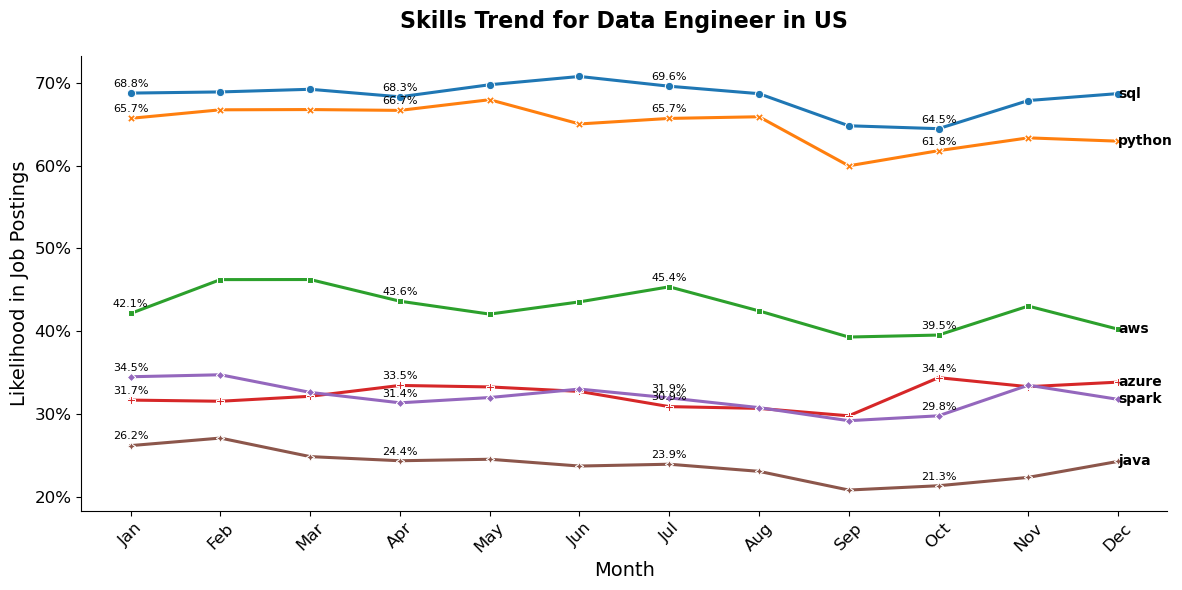

In [52]:
df_plot = df_percent.iloc[:, :6]
plt.figure(figsize=(12, 6))  # Bigger figure for readability

# Plot only first 7 skills for clarity
sns.lineplot(data=df_plot, dashes=False, linewidth=2.2, markers=True, legend=False)

# Title & labels
plt.title('Skills Trend for Data Engineer in US', fontsize=16, weight='bold', pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Likelihood in Job Postings", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(alpha=0.3, linestyle='')

# ---  Add skill names at the end of each line ---
for col in df_plot.columns:
    plt.text(
        x=len(df_plot.index)-1,                     # last x position (Dec)
        y=df_plot[col].iloc[-1],                   # last y value
        s=col,                                     # skill name
        fontsize=10, va='center', ha='left', 
        fontweight='bold'
    )

# ---  Add percent labels on top of each point ---
for col in df_plot.columns:
    for i, val in enumerate(df_plot[col]):
        if i % 3 == 0:  # show every 3rd point (to avoid clutter, remove if you want all)
            plt.text(
                x=i, y=val+0.5, 
                s=f"{val:.1f}%", 
                ha='center', va='bottom', fontsize=8
            )

from matplotlib.ticker import PercentFormatter
# Set y-axis to percentage format
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout
sns.despine()
plt.tight_layout()
plt.show()
